In [1]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

In [3]:
#Read the dataset
hand_df = pd.read_csv("monthly_deaths.csv")

In [4]:
hand_df.tail(5)

,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


In [5]:
hand_df.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [6]:
#Find the shape of the dataset
hand_df.shape

(98, 3)

In [7]:
#Understand the dataset properties
hand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [11]:
#Change the "Date/Time" column's data type from string to datetime
hand_df['date']= pd.to_datetime(hand_df['date'])

In [12]:
hand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
 3   Date    98 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.2 KB


In [13]:
del hand_df['Date']

In [14]:
hand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


Text(0, 0.5, 'Deaths')

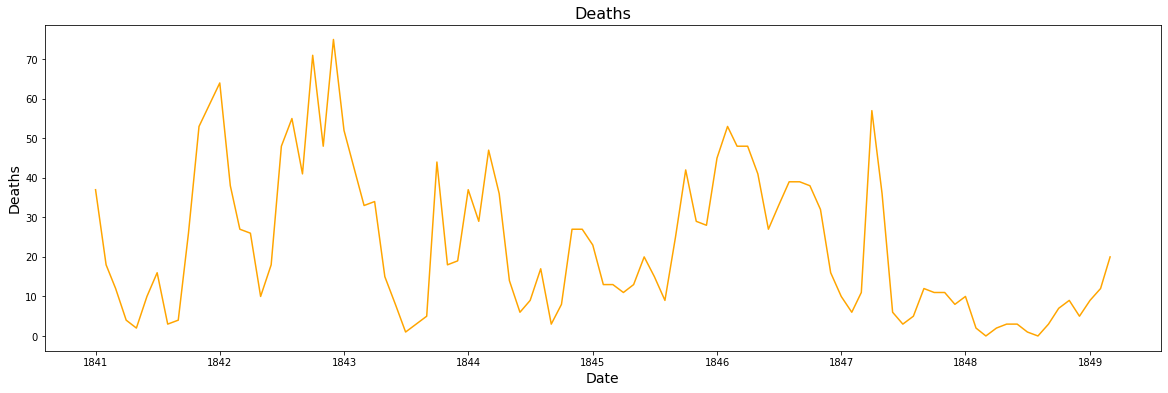

In [16]:
#Visualize deaths through time
fig,ax = plt.subplots(figsize = (20,6))
x= hand_df.date
y= hand_df.deaths
plt.plot(x, y, color= "orange")
plt.title("Deaths", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Deaths", fontsize=14)

Text(0, 0.5, 'Births')

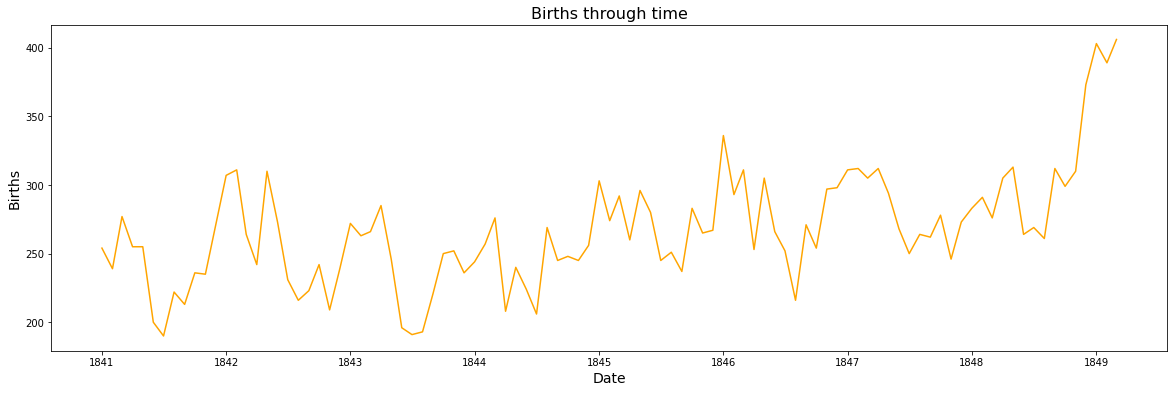

In [17]:
#Visualize births through time
fig,ax = plt.subplots(figsize = (20,6))
x= hand_df.date
y= hand_df.births
plt.plot(x, y, color= "orange")
plt.title("Births through time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Births", fontsize=14)

In [19]:
import numpy as np

In [20]:
#Read the yearly dataset
yearly_df = pd.read_csv("yearly_deaths_by_clinic.csv")

yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [22]:
yearly_df.shape

(12, 4)

In [23]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [24]:
yearly_df.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [25]:
#To make the analysis easier, we can calculate the proportion of deaths.
yearly_df["Proportion of Deaths"] = yearly_df["deaths"] / yearly_df["births"]
yearly_df

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [26]:
#Separate the dataset into 2 datasets, one for each clinic
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]

In [27]:
clinic_1

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


Text(0, 0.5, 'Number of Deaths')

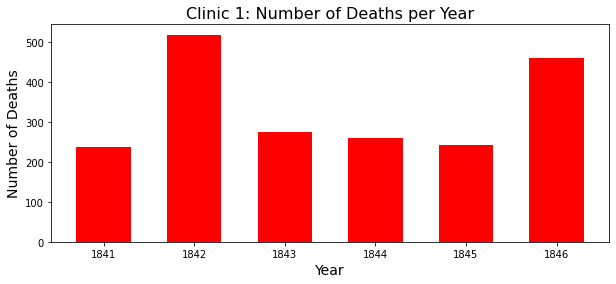

In [28]:
#Visualize the Number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.6, color= "red")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

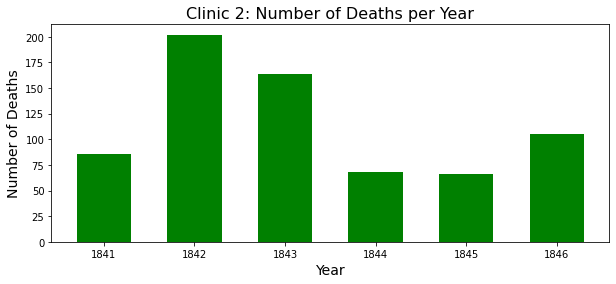

In [29]:
#Visualize the Number of deaths every year in clinic 2
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.6, color= "green")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

<AxesSubplot:xlabel='year', ylabel='Proportion of Deaths'>

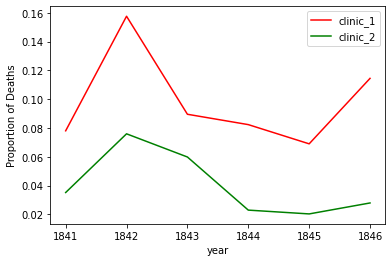

In [30]:
ax= clinic_1.plot(x= "year", y= "Proportion of Deaths", label= "clinic_1", color="red")
clinic_2.plot(x= "year", y= "Proportion of Deaths", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="green")

In [38]:
# Read the monthly dataset
monthly_df = pd.read_csv("monthly_deaths.csv")
monthly_df.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [39]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [40]:
#Calculate the proportion of deaths per month
monthly_df["Proportion of Deaths"]= monthly_df["deaths"] / monthly_df["births"]
monthly_df.head(5)

,date,births,deaths,Proportion of Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [41]:
#Change the data type of "date" column from string to datatime
monthly_df.dtypes
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])

In [42]:
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

Text(0, 0.5, 'Proportion of Deaths')

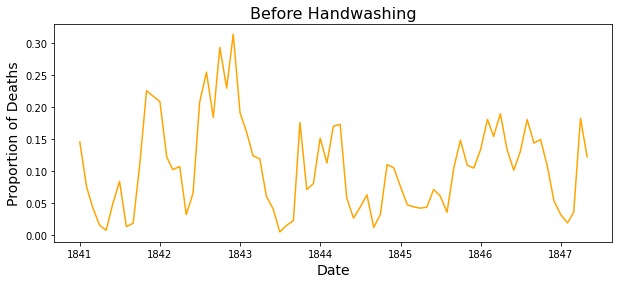

In [43]:
#Before handwashing 
fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["Proportion of Deaths"]
plt.plot(x, y, color= "orange")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

Text(0, 0.5, 'Proportion of Deaths')

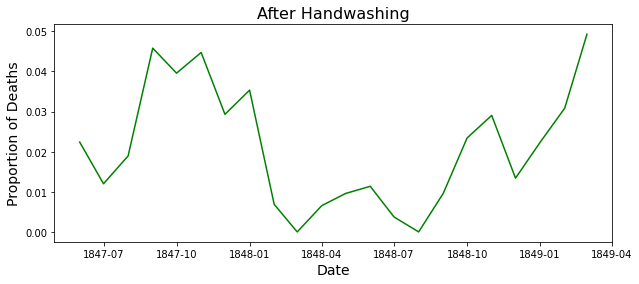

In [44]:
#After handwashing
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["Proportion of Deaths"]
plt.plot(x, y, color= "green")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

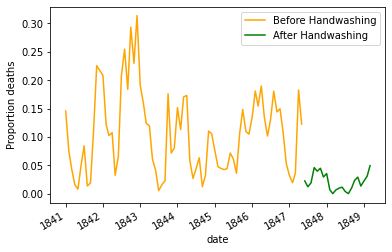

In [50]:
ax= before_washing.plot(x= "date", y= "Proportion of Deaths", label= "Before Handwashing", color="orange")
after_washing.plot(x= "date", y= "Proportion of Deaths", label= "After Handwashing", ax=ax, ylabel= "Proportion deaths", color="green")